In [395]:
import pandas as pd

In [443]:
import numpy as np 
import matplotlib.pyplot as plt

In [445]:
data= pd.read_csv("avito_data.csv")

In [447]:
data.head()

,Unnamed: 0,title,price,city,datetime,nb_rooms,nb_baths,surface_area,equipement,link
0,0,CMN-MA-1641 - Appartement à vendre à Val Fleurie,1 600 000 DH,Casablanca,"11/6/2024, 12:12:49 PM",3.0,1,132,"Ascenseur, Balcon, Parking, Terrasse",https://www.avito.ma/fr/val_fleuri/appartement...
1,1,Appartement à vendre 125 m² à Casablanca,9 900 DH,Casablanca,"11/6/2024, 12:12:26 PM",2.0,2,125,"Balcon, Climatisation, Cuisine Équipée, Parkin...",https://www.avito.ma/fr/autre_secteur/appartem...
2,2,CMN-MA-1787 - Appartement à vendre à Les Hôpitaux,2 300 000 DH,Casablanca,"11/6/2024, 12:10:48 PM",3.0,2,233,"Ascenseur, Balcon, Parking, Terrasse",https://www.avito.ma/fr/quartier_des_h%C3%B4pi...
3,3,Appartement à vendre 3 chambres Salon à Casa,PRIX NON SPÉCIFIÉ,Casablanca,"11/6/2024, 12:10:57 PM",NaN,NaN,NaN,NaN,https://www.avito.ma/fr/ain_sebaa/appartements...
4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://immoneuf.avito.ma/fr/unite/l53?utm_sou...


In [449]:
data_copy = data.drop(columns=['link'])

In [451]:
# Keep only rows where the 9th column (index 8) is not NaN
data_copy = data_copy[~data_copy.iloc[:, 8].isna()]

# Check the shape after dropping rows
data_copy.shape

(868, 9)

In [453]:
data_copy = data_copy.drop(columns=['Unnamed: 0'])

In [455]:
data_copy.head()

,title,price,city,datetime,nb_rooms,nb_baths,surface_area,equipement
0,CMN-MA-1641 - Appartement à vendre à Val Fleurie,1 600 000 DH,Casablanca,"11/6/2024, 12:12:49 PM",3.0,1,132,"Ascenseur, Balcon, Parking, Terrasse"
1,Appartement à vendre 125 m² à Casablanca,9 900 DH,Casablanca,"11/6/2024, 12:12:26 PM",2.0,2,125,"Balcon, Climatisation, Cuisine Équipée, Parkin..."
2,CMN-MA-1787 - Appartement à vendre à Les Hôpitaux,2 300 000 DH,Casablanca,"11/6/2024, 12:10:48 PM",3.0,2,233,"Ascenseur, Balcon, Parking, Terrasse"
5,Appartement à vendre 202 m² à Casablanca,3 000 000 DH,Casablanca,"11/6/2024, 11:59:43 AM",4.0,3,202,"Ascenseur, Balcon, Climatisation, Concierge, T..."
6,Appartement 76 m² bien ensoleillé avec terrasse,17 500 DH,Casablanca,"11/6/2024, 11:59:29 AM",2.0,2,76,"Ascenseur, Balcon, Concierge, Cuisine Équipée,..."


In [456]:
# Obtenir un aperçu des colonnes, types de données, et pourcentage de valeurs manquantes
data_catalogue = pd.DataFrame({
    'Column Name': data_copy.columns,
    'Data Type': data_copy.dtypes,
    'Non-Null Count': data_copy.notnull().sum(),
    'Missing Percentage': data_copy.isnull().mean() * 100
})

# Afficher le catalogue
print(data_catalogue)


               Column Name Data Type  Non-Null Count  Missing Percentage
title                title    object             868            0.000000
price                price    object             868            0.000000
city                  city    object             868            0.000000
datetime          datetime    object             864            0.460829
nb_rooms          nb_rooms   float64             868            0.000000
nb_baths          nb_baths    object             864            0.460829
surface_area  surface_area    object             756           12.903226
equipement      equipement    object             868            0.000000


In [459]:

# Convertir la colonne 'price' en chaîne (au cas où elle contiendrait d'autres types)
data_copy['price'] = data_copy['price'].astype(str)

# Utiliser une expression régulière pour extraire uniquement les chiffres et supprimer tout autre caractère
data_copy['price'] = data_copy['price'].str.replace(r'\D', '', regex=True)  # Remplacer tout caractère non numérique




In [460]:
data_copy['price'] = pd.to_numeric(data_copy['price'], errors='coerce')
data_copy['nb_baths'] = pd.to_numeric(data_copy['nb_baths'], errors='coerce')
data_copy['nb_rooms'] = pd.to_numeric(data_copy['nb_rooms'], errors='coerce')
data_copy['surface_area'] = pd.to_numeric(data_copy['surface_area'], errors='coerce')

# Verify the changes
print(data_copy[['nb_baths', 'nb_rooms', 'surface_area','price']].dtypes)


nb_baths        float64
nb_rooms        float64
surface_area    float64
price             int64
dtype: object


In [464]:
# Calculate descriptive statistics for numeric columns
descriptive_stats = data_copy.describe().T  # Transpose to view each column in rows

# Add the median to the statistics
descriptive_stats['median'] = data_copy.median(numeric_only=True)

# Display only mean, median, and standard deviation
print(descriptive_stats[['mean', 'median', 'std']])


                      mean     median           std
price         2.330427e+06  1262100.0  2.169921e+07
nb_rooms      2.458525e+00        2.0  7.529312e-01
nb_baths      1.946759e+00        2.0  4.354717e+00
surface_area  1.158135e+02      107.5  5.662745e+01


In [465]:

# Calculate preliminary statistics for numerical columns
numeric_data = data_copy.select_dtypes(include='number')
preliminary_stats = numeric_data.describe().T  # transpose for readability

# Calculate additional metrics: median
preliminary_stats['median'] = numeric_data.median()


In [466]:
preliminary_stats

,count,mean,std,min,25%,50%,75%,max,median
price,868.0,2.330427e+06,2.169921e+07,44.0,780000.0,1262100.0,1900000.0,627900000.0,1262100.0
nb_rooms,868.0,2.458525e+00,7.529312e-01,1.0,2.0,2.0,3.0,7.0,2.0
nb_baths,864.0,1.946759e+00,4.354717e+00,0.0,1.0,2.0,2.0,110.0,2.0
surface_area,756.0,1.158135e+02,5.662745e+01,11.0,76.0,107.5,140.0,447.0,107.5


| Variable        | Moyenne        | Médiane       | Écart-Type    | Observation sur la Distribution                              |
|-----------------|----------------|---------------|---------------|-------------------------------------------------------------|
| **Prix (price)**      | 2,330,427      | 1,262,100     | N/A           | Asymétrie positive (moyenne > médiane)                       |
| **Nb de chambres (nb_rooms)** | 2.46           | 2             | N/A           | Distribution relativement symétrique (moyenne ≈ médiane)    |
| **Nb de salles de bains (nb_baths)** | 1.95           | 2             | 4.35          | Distribution asymétrique avec des outliers (écart-type élevé)|
| **Surface (surface_area)** | 115.81 m²      | 107.5 m²      | 56.63 m²      | Asymétrie (moyenne > médiane) avec une forte variabilité     |


## Imputation des Valeurs Manquantes

L'imputation des valeurs manquantes dépend de la distribution des variables. Voici les recommandations pour chaque type de variable :

| Variable               | Type de Distribution    | Méthode d'Imputation Recommandée                                  | Justification                                                                                                                                                        |
|------------------------|-------------------------|-------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Prix (price)**        | Asymétrique (positivement biaisée) | Médiane ou méthode avancée (KNN, régression)                     | La médiane est une bonne option pour éviter l'influence des valeurs extrêmes. Si la distribution est très biaisée, l'imputation par KNN ou régression peut être envisagée. |
| **Nb de chambres (nb_rooms)** | Symétrique           | Médiane                                                            | La médiane est bien adaptée, car elle est moins influencée par les valeurs aberrantes et les distributions symétriques.                                                |
| **Nb de salles de bains (nb_baths)** | Asymétrique (avec des outliers) | Médiane ou KNN                                                     | La médiane est une bonne option, mais si des valeurs extrêmes sont présentes, l'imputation par KNN pourrait être une méthode plus robuste.                          |
| **Surface (surface_area)** | Asymétrique            | Médiane ou méthode avancée (KNN, régression)                      | Comme pour le prix, la médiane est une bonne approche. Si la distribution est fortement biaisée, des méthodes plus avancées (KNN, régression) peuvent être utilisées.  |

### Explication
- **Pour les variables symétriques** : La médiane est préférée, car elle n'est pas influencée par des valeurs extrêmes. Cela est particulièrement pertinent pour les variables comme le nombre de chambres.
  
- **Pour les variables asymétriques (prix et surface)** : La médiane peut également être utilisée pour l'imputation, mais dans le cas où la distribution est très biaisée, des techniques plus sophistiquées comme l'imputation par **KNN** ou **régression** peuvent être envisagées pour mieux capturer la relation entre les variables et les valeurs manquantes.


In [474]:
import pandas as pd
from sklearn.impute import KNNImputer
from scipy.stats import mode

# Utiliser le DataFrame data_copy
# df = data_copy

# -----------------------------------------
# 1. Imputation avec KNN (pour price et surface_area)
# -----------------------------------------

# Sélectionner les colonnes numériques pour KNN (ici, 'price' et 'surface_area')
knn_columns = ['price', 'surface_area']

# Instancier le modèle KNN Imputer avec k=3 voisins (ajustez selon les besoins)
knn_imputer = KNNImputer(n_neighbors=3)

# Appliquer KNN uniquement sur les variables numériques (pour imputer les valeurs manquantes)
data_copy[knn_columns] = knn_imputer.fit_transform(data_copy[knn_columns])

# -----------------------------------------
# 2. Imputation avec le Mode (pour nb_rooms et nb_baths)
# -----------------------------------------

# Calculer le mode (valeur la plus fréquente) pour 'nb_rooms' et 'nb_baths'
mode_nb_rooms = data_copy['nb_rooms'].mode()# Mode sans les NaN
mode_nb_baths = data_copy['nb_baths'].mode()
# Remplacer les valeurs manquantes par le mode
data_copy['nb_rooms'].fillna(mode_nb_rooms, inplace=True)
data_copy['nb_baths'].fillna(mode_nb_baths, inplace=True)

# -----------------------------------------
# Vérification des valeurs manquantes après imputation
# -----------------------------------------

# Afficher le nombre de valeurs manquantes restantes pour chaque colonne
print(data_copy.isnull().sum())


title           0
price           0
city            0
datetime        4
nb_rooms        0
nb_baths        4
surface_area    0
equipement      0
dtype: int64


C:\Users\Youcode\AppData\Local\Temp\ipykernel_1304\433309785.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_copy['nb_rooms'].fillna(mode_nb_rooms, inplace=True)
C:\Users\Youcode\AppData\Local\Temp\ipykernel_1304\433309785.py:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a cop

In [476]:
from scipy.stats import zscore
# Detect outliers in 'price_numeric' using Z-score: values far from the mean (±3 standard deviations)
data_copy['price_z'] = zscore(data_copy['price'])
price_outliers = data_copy[(data_copy['price_z'] > 3) | (data_copy['price_z'] < -3)]


In [478]:
price_outliers

,title,price,city,datetime,nb_rooms,nb_baths,surface_area,equipement,price_z
616,Marina Casablanca Appartement Vue Mer,627900000.0,Casablanca,"10/25/2024, 10:59:55 AM",3.0,4.0,265.0,"Ascenseur, Balcon, Chauffage, Climatisation, C...",28.845764
737,Appartement a vendre à Benjdia Casablanca,125000000.0,Casablanca,"10/21/2024, 11:52:51 AM",3.0,2.0,140.0,"Ascenseur, Balcon, Concierge, Cuisine Équipée,...",5.656441


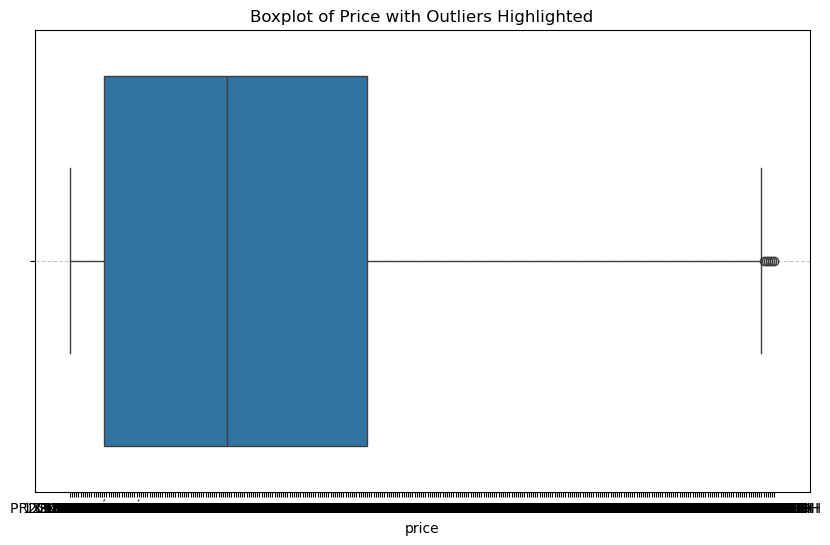

In [490]:
# Boxplot to visualize outliers in 'price_cleaned'
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['price'])
plt.title("Boxplot of Price with Outliers Highlighted")
plt.xlabel("price")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Outliers in 'area': 36


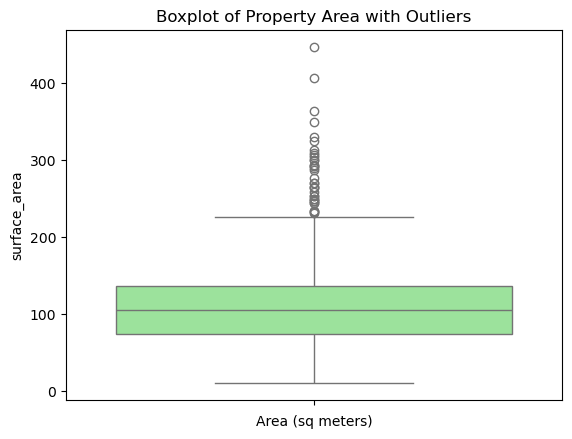

In [481]:
# Calculate Interquartile Range (IQR) for 'area' and detect outliers based on spread
Q1 = data_copy['surface_area'].quantile(0.25)
Q3 = data_copy['surface_area'].quantile(0.75)
IQR = Q3 - Q1
area_outliers = data_copy[(data_copy['surface_area'] < (Q1 - 1.5 * IQR)) | (data_copy['surface_area'] > (Q3 + 1.5 * IQR))]
print("Outliers in 'area':", len(area_outliers))

# Visualize area with a boxplot

sns.boxplot(data_copy['surface_area'], color="lightgreen")
plt.title("Boxplot of Property Area with Outliers")
plt.xlabel("Area (sq meters)")
plt.show()